<a href="https://colab.research.google.com/github/olesyamba/Risk_analysis/blob/main/Credit_risk_1_Risk_Components_and_Arithmetic_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Компоненты кредитного риска

## 1.1 Определения и обозначения

**Кредитный риск** - событийный вид риска.

Событие-триггер -- **дефолт**, под которым типично понимается отказ и неспособность исполнять свои финансовые обязательства по договору.

Событие дефолта приводит к возникновению **кредитных потерь**.

###_
**У кредитного риска отдельного кредита есть следующие атрибуты**:

* $t$ - текущий момент времени; момент оценки риска.

* $h >0$  - горизонт риска; будущий период, в течение которого кредитор подвержен риску дефолта; чаще всего ограничен сроком кредитного договора, но бывают и нюансы (например, бесрочная кредитная линия)

* $\tau$ - момент дефолта, случайное событие в пределах горизонта риска.

* $PD_t (h) = P (\tau < t + h)$ (probability of default) - вероятность дефолта заемщика в течение  горизонта риска; может задаваться по-разному и является атрибутом модели; неубывающая функция распределения времени до дефолта.

* $SF_t(h) = 1 - PD_t(h)$ (survival function) - функция "дожития"; вероятность НЕ допустить дефолт на горизонте $h$.

* $EAD(\tau)$ (exposure-at-default) - экспозиция при дефолте; предельный уровень потерь, с которым вероятно предстоит столкнуться в случае объявления дефолта заемщиком в момент времени $\tau$; обычно определяется как размер законного требования к заемщику (условия контракта, нормы закона). Может быть как детерминированным, так и случайным.

* $LGD(\tau) \in [0, 1]$ (loss-given-default) - фактическая доля понесенных потерь относительно экспозиции; определяется с учетом обеспечения или очередности прав требований по обязательствам. Типично случайна,
и в момент $\tau$ часто используется оценка, т.к. фактическое значение может быть устрановленно существенно позже. Для целей ценообразования также используют $RR(\tau) = 1 - LGD(\tau)$ (recovery rate) - доля возмещения.

**Механизм развития дефолта по кредиту**:

1. Произошел ли дефолт на горизонте $h$? Если нет, то кредитные потери равны 0.
2. Если да, тогда в какой момент $\tau$ произошел дефолт?
3. Какая уровень экспозиции к риску дефолта $EAD$ был в момент $\tau$?
4. Какой уровень фактических потерь $LGD$ понесен в результате дефолта

**Функцию (случайную) кредитных потерь по одному кредиту можно записать в следующем виде**:

$$L(\tau) = I(\tau< t+h) \cdot EAD(\tau) \cdot LGD(\tau), \;  [1]$$

где $I(\tau< t+h)$ - индикатор дефолта на горизонте $h$ и имеет распределение Бернулли $B_{PD_t(h)}$.

**Функцию (случайную) кредитных потерь по портфелю, состоящему из** $N$ **кредитов, можно записать в следующем виде:**

$$L^P(\tau) = \sum_{n = 1,\ldots, N} [I(\tau_n< t+h) \cdot EAD_n(\tau) \cdot LGD_n(\tau)], \; [2]$$

*Замечание: строго говоря, еще требуется дисконтирование, но для простоты проигнорируем*





#### Раздел включает:

* Моделирование и оценку $PD$
* Случаи детерминированных $EAD$ (например, обыкновенные кредиты или облигации) + ее определение в момент дефолта
* $LGD$ = экзогенно заданная детерминированная или случайная величина
* Влияние корреляции дефолтов $\rho$ на портфельный кредитный риск (распределение убытков и $VaR$).

## 1.2 Арифметика PD

* Дискретная модель
  - дефолты наблюдаются только в определенные моменты времени в течение горизонта риска (напримере, только в моменты очередных платежей по кредиту);
  - $PD_t(h) =\sum_{t_i < h} P_t(\tau = t_i) =  \sum_{t_i < h} P_t(\tau = t_i|\tau > t_{i-1}) [1 - P_t(\tau  \leq t_ {i-1})] = \sum_{t_i < h} P_t(\tau = t_i|\tau > t_{i-1}) SF_t(t_{i-1} - t)$
  
   т.е. сумма вероятностей столкнуться с дефолтом в очередную дату; по формуле полной вероятности;
  - может задаваться:
    - как точками распределения $PD_t(t_i -t)$,
    - так и плотностью (маржинальными вероятностями) $P(\tau = t_i)$,
    - так и условной плотностью (форвардными вероятностями) $P(\tau = t_i| \tau >t_{i-1})$.  

* Непрерывная модель
  - дефолты могут возникать в любой момент времени
  - центральный объект - интенсивность дефолта $\lambda_t(x)$, а $PD_t(h) = 1 - e^{-\int_{0}^h \lambda_t(x)dx}$
  - $\lambda_t(x)$ (hazard function) - условная плотность дефолта в момент $x$ при условии, что до $x$ дефолт не произошел, т.е. $P_t(\tau \in (t+x, t+x +dx) | \tau > t+x) \approx \lambda_t(x) dx $.
  - $\lambda_t(x)$  - можно грубо интерпретировать как количество дефолтов на единицу времени в последовательности кредитов.

* Гибрид - интерполированная дискретная модель
  - косочно-постоянная функция $\lambda (h)$: $P(\tau = t_i| \tau >t_{i-1}) = 1 - e^{-\sum_{i} \lambda_i (t_i - t_{i-1})}$
  - другая функция, например, сплайновая фунцкия.


,PD cumulative
2011-01-01,0.00
2011-07-01,0.03
2012-01-01,0.06
2012-07-01,0.09
2013-01-01,0.12
2013-07-01,0.15
2014-01-01,0.18


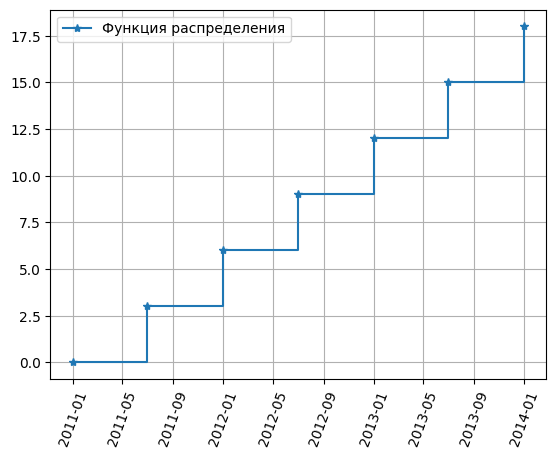

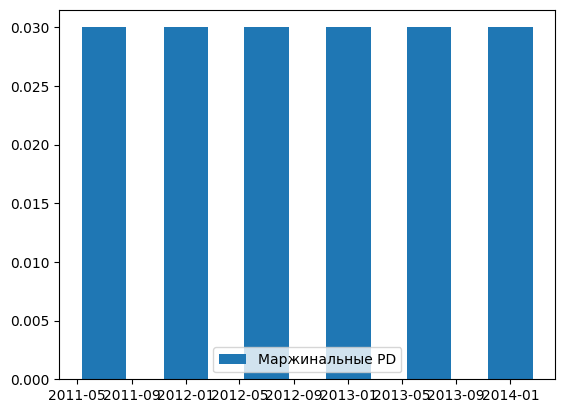

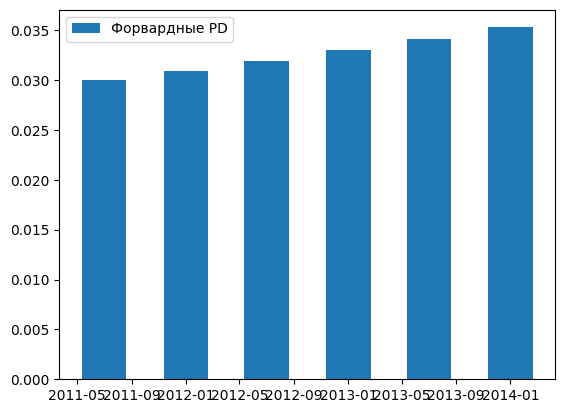

(<matplotlib.legend.Legend at 0x79ce70c8a590>, None)

In [3]:
# Место для кода

# Дискретной модели

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Исходные данные

dates = np.arange('2011-01-01', '2014-07-01', dtype = 'datetime64[6M]').astype('datetime64[D]') # первая дата - текущий момент или момент выдачи кредита
pd_cm = np.array([0, .03, .06, .09, .12, .15, .18])
data = pd.DataFrame({'PD cumulative':pd_cm}, index = dates)
display(data)

plt.step(dates, 100*pd_cm, '-*', where = 'post',  label = 'Функция распределения')
plt.xticks(rotation = 70)
plt.legend(), plt.grid(), plt.show()

# Маржинальные вероятности
pd_mrg = pd_cm[1:] - pd_cm[:-1]
plt.bar(dates[1:], pd_mrg, width= 100, label = 'Маржинальные PD')
plt.legend(), plt.show()

# Форвардные вероятности
sv_cm = 1 - pd_cm
pd_fwd = pd_mrg/sv_cm[:-1]
plt.bar(dates[1:], (pd_cm[1:] - pd_cm[:-1])/(1 - pd_cm[:-1]), width= 100,  label = 'Форвардные PD')
plt.legend(), plt.show()

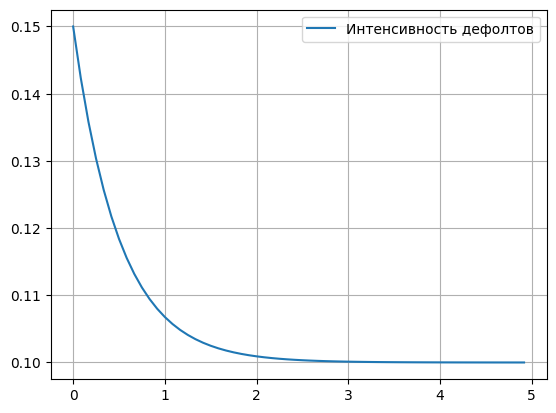

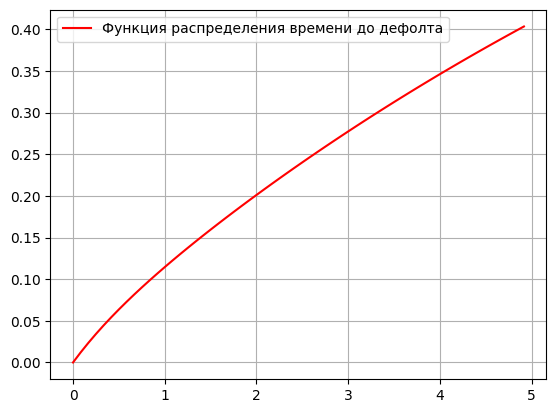

(<matplotlib.legend.Legend at 0x79ce70cf8520>, None)

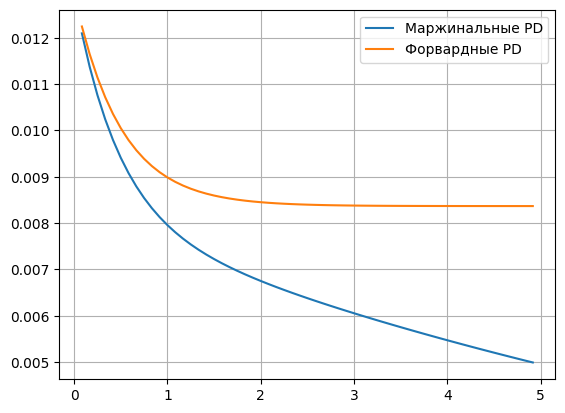

In [4]:
# Непрерывная модель
import numpy as np
import scipy.integrate as integrate

# hzr_fun = np.vectorize( lambda x: 0.05 + 0.02*np.sin(x*0.5*np.pi))
hzr_fun = np.vectorize( lambda x: 0.1 + 0.05*np.exp(-2*x)) # x - выражен в годах

pd_fun = np.vectorize(lambda x: 1 - np.exp(- integrate.quad(hzr_fun, 0, x)[0]))
sv_fun = np.vectorize(lambda x: 1 - pd_fun(x))

terms = np.arange(0, 5, 1/12) # рассмотрим горизонт 5 лет,месячные интервалы

plt.plot(terms, hzr_fun(terms), label = 'Интенсивность дефолтов')
plt.legend(), plt.grid()
plt.show()

plt.plot(terms, pd_fun(terms), 'r' , label = 'Функция распределения времени до дефолта')
plt.legend(), plt.grid()
plt.show()

plt.plot(terms[1:], pd_fun(terms[1:]) - pd_fun(terms[:-1]), label = 'Маржинальные PD')
plt.plot(terms[1:], (pd_fun(terms[1:]) - pd_fun(terms[:-1]))/sv_fun(terms[1:]), label = 'Форвардные PD')
plt.legend(), plt.grid()

In [16]:
# Гибрид (интерполяция дискретной модели)
# Используем пример из дискретной модели выше. Определим, каким должны быть интенсивности дефолтов при условии, что внутри каждого платежного периода интенсивность постоянна

dates =np.arange('2011-01', '2014-07', dtype='datetime64[6M]').astype('datetime64[D]') # первая дата - момент выдачи кредита, остальные - даты платежей, когда может произойти дефолт
pd_cm  = np.array([0, .03, .06, .09, .12, .15, .18]) # Значения функции распределения в даты

pd_fwd = (pd_cm[1:] - pd_cm[:-1])/(1 - pd_cm[:-1]) # значения форвардных PD на каждом участке
terms = (dates[1:] - dates[:-1]).astype('float')/365 # значения сроков (x) между платежами в годах для вычисления интенсивностей

hzr_imp =  - np.log(1 - pd_fwd)/terms # implied hazards для кусочно-постоянной интенсивности, решаем уравнение для каждого периода относительно интенсивности
print('Реальная форвардная PD = {:.2%}, интерполировная форвардная PD = {:.2%}'.format(pd_fwd[0], 1 - np.exp(-hzr_imp[0]*terms[0])))

display(pd.DataFrame({'dates':dates[:-1], 'hzrds': hzr_imp, 'pd_fwd': pd_fwd, 'pd_cm': pd_cm[1:]}))

Реальная форвардная PD = 3.00%, интерполировная форвардная PD = 3.00%


,dates,hzrds,pd_fwd,pd_cm
0,2011-01-01,0.061423,0.030000,0.03
1,2011-07-01,0.062320,0.030928,0.06
2,2012-01-01,0.065049,0.031915,0.09
3,2012-07-01,0.066499,0.032967,0.12
4,2013-01-01,0.069946,0.034091,0.15
5,2013-07-01,0.071278,0.035294,0.18


## 1.3 Арифметика EAD

Основные параметры:

* расписание платежей,
* правила погашения (есть ли амортизация),
* определение очередного платежа (конверция счета дней),
* учет накопленного купона.  



<ipython-input-6-4a56fd0bcdd4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['interest'][1:] = (r/100)*V*data['term'][1:] # проценты определяются пропорционально сроку


,term,due,interest,EAD
2011-01-01,0.00000,10000,0.000000,10000.000000
2011-07-01,0.49589,10000,247.945205,10247.945205
2012-01-01,0.50411,10000,252.054795,10252.054795
2012-07-01,0.49863,10000,249.315068,10249.315068
2013-01-01,0.50411,10000,252.054795,10252.054795
2013-07-01,0.49589,10000,247.945205,10247.945205
2014-01-01,0.50411,10000,252.054795,10252.054795
2014-07-01,0.49589,10000,247.945205,10247.945205
2015-01-01,0.50411,10000,252.054795,10252.054795
2015-07-01,0.49589,10000,247.945205,10247.945205


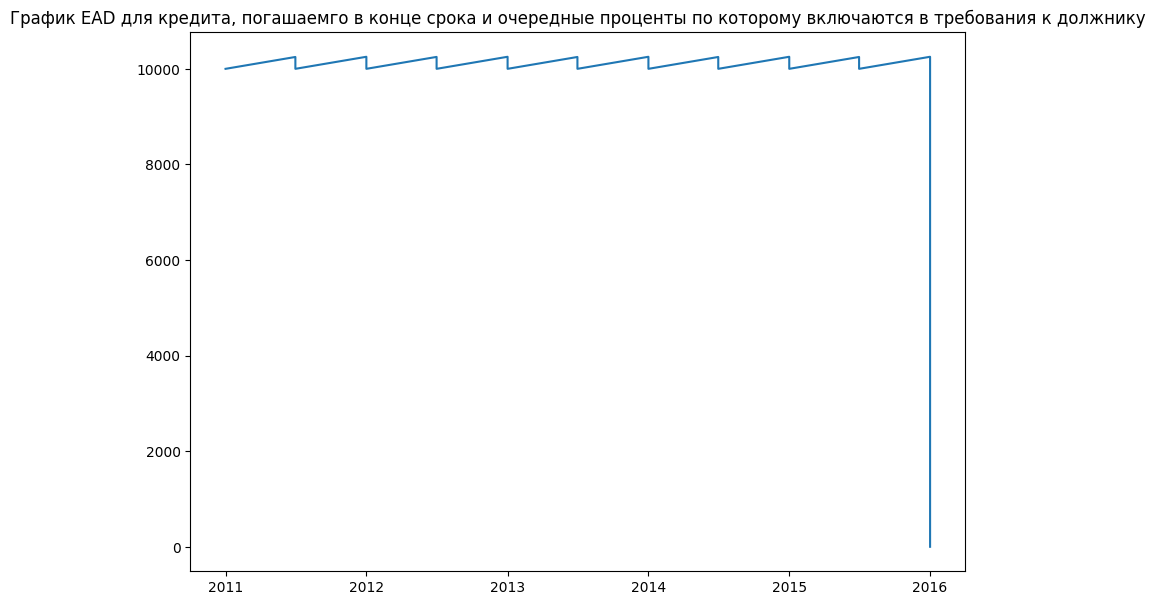

In [6]:
# Место для кода

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Место для кода

# Рассмотрим кредит, который погашается в единовременно в конце срока и по которому уплачивается полугодовой процент.

V = 10000
s = 5 # срок в годах
r = 5 # процентная ставка в % годовых; начисление дискретное; конвенция счета дней: act/365;
m = 2 # столько раз в год; каждые полгода (не то же самое, что каждые 182 дня)

# Составим таблицу (график) платежей
dates_int = np.arange('2011-01-01', '2016-07-01', dtype='datetime64[6M]').astype('datetime64[D]') #даты выплат по кредиту

# будем заполнять поля:
  # terms - срок с начала кредита
  # due - непогашенный остаток основного долга
  # interest - сумма очередной процентной выплаты
  # EAD - экспозиция при дефолте
data = pd.DataFrame(np.nan, index = dates_int, columns = ['term', 'due', 'interest',  'EAD'])
data.iloc[0,:] = [0,  V, 0 , V] # в момент выдачи кредита EAD = объему кредита без процентов

# Заполняем записи в даты выплат
data['term'][1:] = (dates_int[1:] - dates_int[:-1]).astype('float')/365 # срок вычисляем в годах в соответствии с конвенцией счета дней (ставка процента расчитана на 365 дней, а сумма платежа вычисляется из количества фактически прошедших дней)
data['due'] = V # по условию кредит погашается целиком в конце, поэтому основной долг не уменьшается и равен объему выданного кредита
data['interest'][1:] = (r/100)*V*data['term'][1:] # проценты определяются пропорционально сроку
data['EAD'] = data['due'] + data['interest'] # EAD склатывается из суммы основного долга + накопленный процент

display(data)

# Посмотрим на график EAD от времени. Обращаем внимание, что экспозиция снижается сразу после уплаты процента, и возрастает по мере накопленния следующего

# Подготовим точки
time_plt = np.repeat(data.index, 2)[1:] # дублируем даты, чтобы увидеть скачки EAD
EAD_plt = np.repeat(data.EAD, 2)[1:] # локальных максимумов EAD достигает в дни уплаты процента, т.е. когда сумма накопленного процента максимальна
EAD_plt[0:-1:2] = data.due[1:] # после очередной выплаты процента EAD падает до оставшейся суммы основного долга (если кредит погашается, эта часть постепенно снижается)
EAD_plt[-1] = 0 #если кредит погашен, то EAD становится равно 0.

# Рисуем график
plt.figure(figsize = (10,7))
plt.plot(time_plt, EAD_plt)
plt.title('График EAD для кредита, погашаемго в конце срока и очередные проценты по которому включаются в требования к должнику')
plt.show()


In [19]:
# Определим EAD на произвольную дату

dt = np.datetime64('2011-03-08') # Предположим, что дефолт объявлен 8 марта 2011 года
# EAD будет складываться из суммы непогашенного долга с момента последнего платежа и накопленного процента пропорционально сроку прошедшего также с момента уплаты последнего платежа

# Определим, в какой платежный период произошел дефолт
n = 1
print('Дата очередного платежа: ', data.index[n]) # дата ближайшего платежа

# Определим размер платежа
accr_pr =  (dt - data.index[n-1]).days/365 # период до дефолта, за который успел накопиться очередной процент
print('EAD на дату {:} равно {:.2f}'.format(dt, data.due[n] + data.interest[n]*accr_pr/data.term[n])) # вклад процента в EAD опеределяется пропорционально доли периода, порошедшего до дефолта.

Дата очередного платежа:  2011-07-01 00:00:00
EAD на дату 2011-03-08 равно 10090.41
